In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import harmonypy
import pymn
import scrublet as scr
import gseapy as gp
from gseapy.plot import barplot, dotplot
import bottleneck
import pyreadr
from scipy.io import mmread
import scipy
from sklearn import preprocessing
import random as rd
import scib
from matplotlib_venn import venn2,venn2_circles,venn3
from pyscenic.export import export2loom, add_scenic_metadata
from sklearn.decomposition import NMF
from sklearn import metrics
import palettable
from pyscenic.rss import regulon_specificity_scores
import matplotlib.image as mpimg
from scipy import stats
from sklearn import metrics
import palettable

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
Error: package or namespace load failed for 'methods' in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/public/home/guogjgroup/ggj/anaconda3/envs/R3.6/lib/R/library/methods/libs/methods.so':
  libR.so: cannot open shared object file: No such file or directory
During startup - Warning messages:
1: package 'methods' was built under R version 3.6.3 
2: package "methods" in options("defaultPackages") was not found 
3: package 'datasets' was built under R version 3.6.3 
4: package 'grDevices' was built under R version 3.6.3 
5: package 'graphics' was built under R version 3.6.3 
6: package 'methods' was built under

In [2]:
sc.set_figure_params(dpi = 200, color_map = 'viridis_r' )
sc.settings.verbosity = 2

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [3]:
def type_composition(adata_used, clustering_used, type_displayed):
    
    cluster_stat_all = pd.DataFrame()

    for each_tissue in np.unique(adata_used.obs[type_displayed]).tolist():

        each_tissue_stat = pd.DataFrame(adata_used[adata_used.obs[type_displayed] == each_tissue].obs[clustering_used].value_counts())
        each_tissue_stat.columns = [each_tissue]
        cluster_stat_all = pd.concat([each_tissue_stat, cluster_stat_all], axis = 1)

    cluster_stat_all = cluster_stat_all.fillna(0)
    column_list = cluster_stat_all.columns.tolist()
    cluster_stat_all['all_cell'] = cluster_stat_all.sum(axis=1)

    for i in column_list:

        cluster_stat_all[i] = cluster_stat_all[i]/cluster_stat_all['all_cell']

    del cluster_stat_all['all_cell']

    cluster_stat_all['cluster'] = cluster_stat_all.index
    #cluster_stat_all['cluster'] = cluster_stat_all['cluster'].astype(int)
    cluster_stat_all = cluster_stat_all.sort_values('cluster')

    del cluster_stat_all['cluster']

    with plt.rc_context({"figure.figsize": (16, 3), "figure.dpi": (200)}):
        cluster_stat_all.plot(kind = 'bar', stacked = True)
        plt.grid(False)
    #        plt.axis('off')
        plt.legend(bbox_to_anchor=(1.0, 1.0))

# Reesults Display

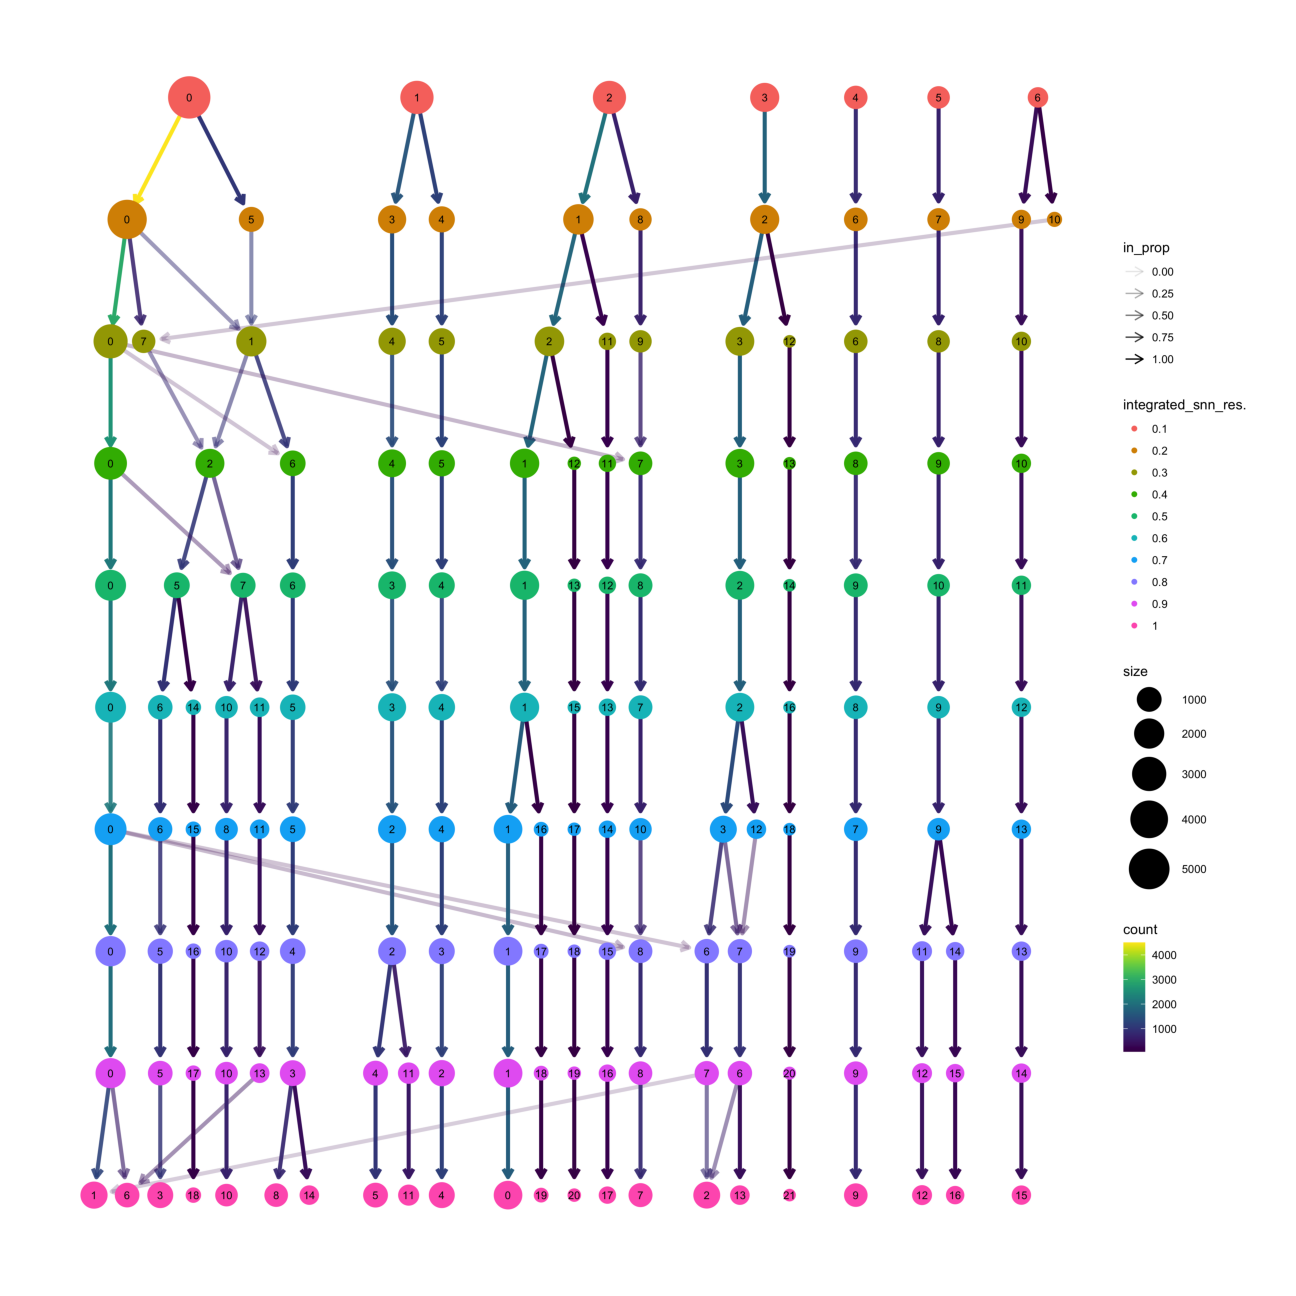

In [16]:
plt.imshow(mpimg.imread("adata_for_seurat_endo_no_AML_sct_cluster_multiple_res_clustree.png"))
plt.grid(False)
plt.axis('off')
plt.show()

# Annotation: Resolution = 0.5

In [4]:
adata = sc.read('/public/home/guogjgroup/ggj/matq_analysis/pan_cancer/all_cell/adata_all_cell_raw_with_anno_latest.h5ad')
adata_res = sc.read('adata_all_endo_cell_sct_marker.h5ad')

adata = adata[adata_res.obs.index.tolist(), :]

adata.obs['leiden'] = adata_res.obs['res_0.5']
adata.uns['all_cell_marker'] = adata_res.uns['res_0.5_marker']

adata_graph = sc.read('adata_for_seurat_endo_no_AML_sct.h5ad')
adata = adata[adata_graph.obs.index.tolist(), :]

adata.obsm['X_umap'] = adata_graph.obsm['X_umap']
adata.obsm['X_pca'] = adata_graph.obsm['X_pca']

adata.write('adata_all_endo_cell_sct_annotation_latest.h5ad')

/tmp/ipykernel_12858/1467315347.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata_res.obs['res_0.5']


In [17]:
clustering_used = 'leiden'

anno_df = adata.obs[[clustering_used]].copy()

anno_df[clustering_used].replace('0', 'Liver sinusoidal_like TEC', inplace=True)

anno_df[clustering_used].replace('1', 'Vasculogenic mimicry TEC', inplace=True)

anno_df[clustering_used].replace('2', 'Lymphatic TEC', inplace=True)

anno_df[clustering_used].replace('3', 'Tip TEC', inplace=True)

anno_df[clustering_used].replace('4', 'Arterial TEC', inplace=True)
    
anno_df[clustering_used].replace('5', 'Tip_like TEC', inplace=True)

anno_df[clustering_used].replace('6', 'Venous TEC', inplace=True)

anno_df[clustering_used].replace('7', 'Capillary TEC', inplace=True)

anno_df[clustering_used].replace('8', 'MT high TEC', inplace=True)

anno_df[clustering_used].replace('9', 'Peri TEC', inplace=True)

anno_df[clustering_used].replace('10', 'Immune_like TEC', inplace=True)

anno_df[clustering_used].replace('11', 'Pulmonary TEC', inplace=True)

anno_df[clustering_used].replace('12', 'Cell cycle TEC', inplace=True)

anno_df[clustering_used].replace('13', 'Vasculogenic mimicry TEC_PGC high', inplace=True)

anno_df[clustering_used].replace('14', 'Lymphatic_like TEC', inplace=True)

anno_df['anno'] = anno_df[clustering_used].astype(str)

anno_df = anno_df.loc[adata.obs.index.tolist(), :]
adata.obs['anno'] = anno_df['anno'].copy()
adata.obs['anno'] = adata.obs['anno'].astype(str)

In [21]:
marker_dict = {
    'Arterial TEC': ['FBLN5', 'EFNB2', 'SULF1'],
    'Capillary TEC': ['BTNL9', 'CD36'],
    'Cell cycle TEC': ['C2orf48', 'DIAPH3', 'CIT'],
    'Immune_like TEC': ['PTPRC', 'DOCK2', 'ARHGAP15'],
    'Liver sinusoidal_like TEC': ['STAB1', 'STAB2'],
    'Lymphatic TEC': ['PROX1', 'PDPN'],
    'MT high TEC': ['MT-CYB', 'MT-ND4', 'MT-CO1'],
    'Peri TEC': ['COL1A2', 'CARMN', 'PDGFRB'],
    'Pulmonary TEC': ['PRICKLE2', 'STXBP6'],
    'Tip TEC': ['COL4A1', 'COL4A2', 'PODXL'],
    'Vasculogenic mimicry TEC': ['ERBB4', 'COBL', 'SHROOM3', 'PGC'],
    'Venous TEC': ['MYRIP', 'IL1R1', 'CDH23'],
#    'Brain_like ECs': ['SLC8A1', 'GPM6A', 'CTTNBP2', 'DAPK1', 'PRKCA', 'BAALC'],
#    'Unknown_5': ['PLEKHG1', 'COL4A2', 'MSN', 'LINC-PINT', 'FLT1', 'ARHGAP26', 'SSH1', 'COL4A1', 'EVA1C', 'PLXNA2',
#                  'ACTN1', 'NEDD9', 'ZFP36', 'ADAMTS9', 'FOSL2', 'NR4A1', 'PDLIM1'],
 }

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


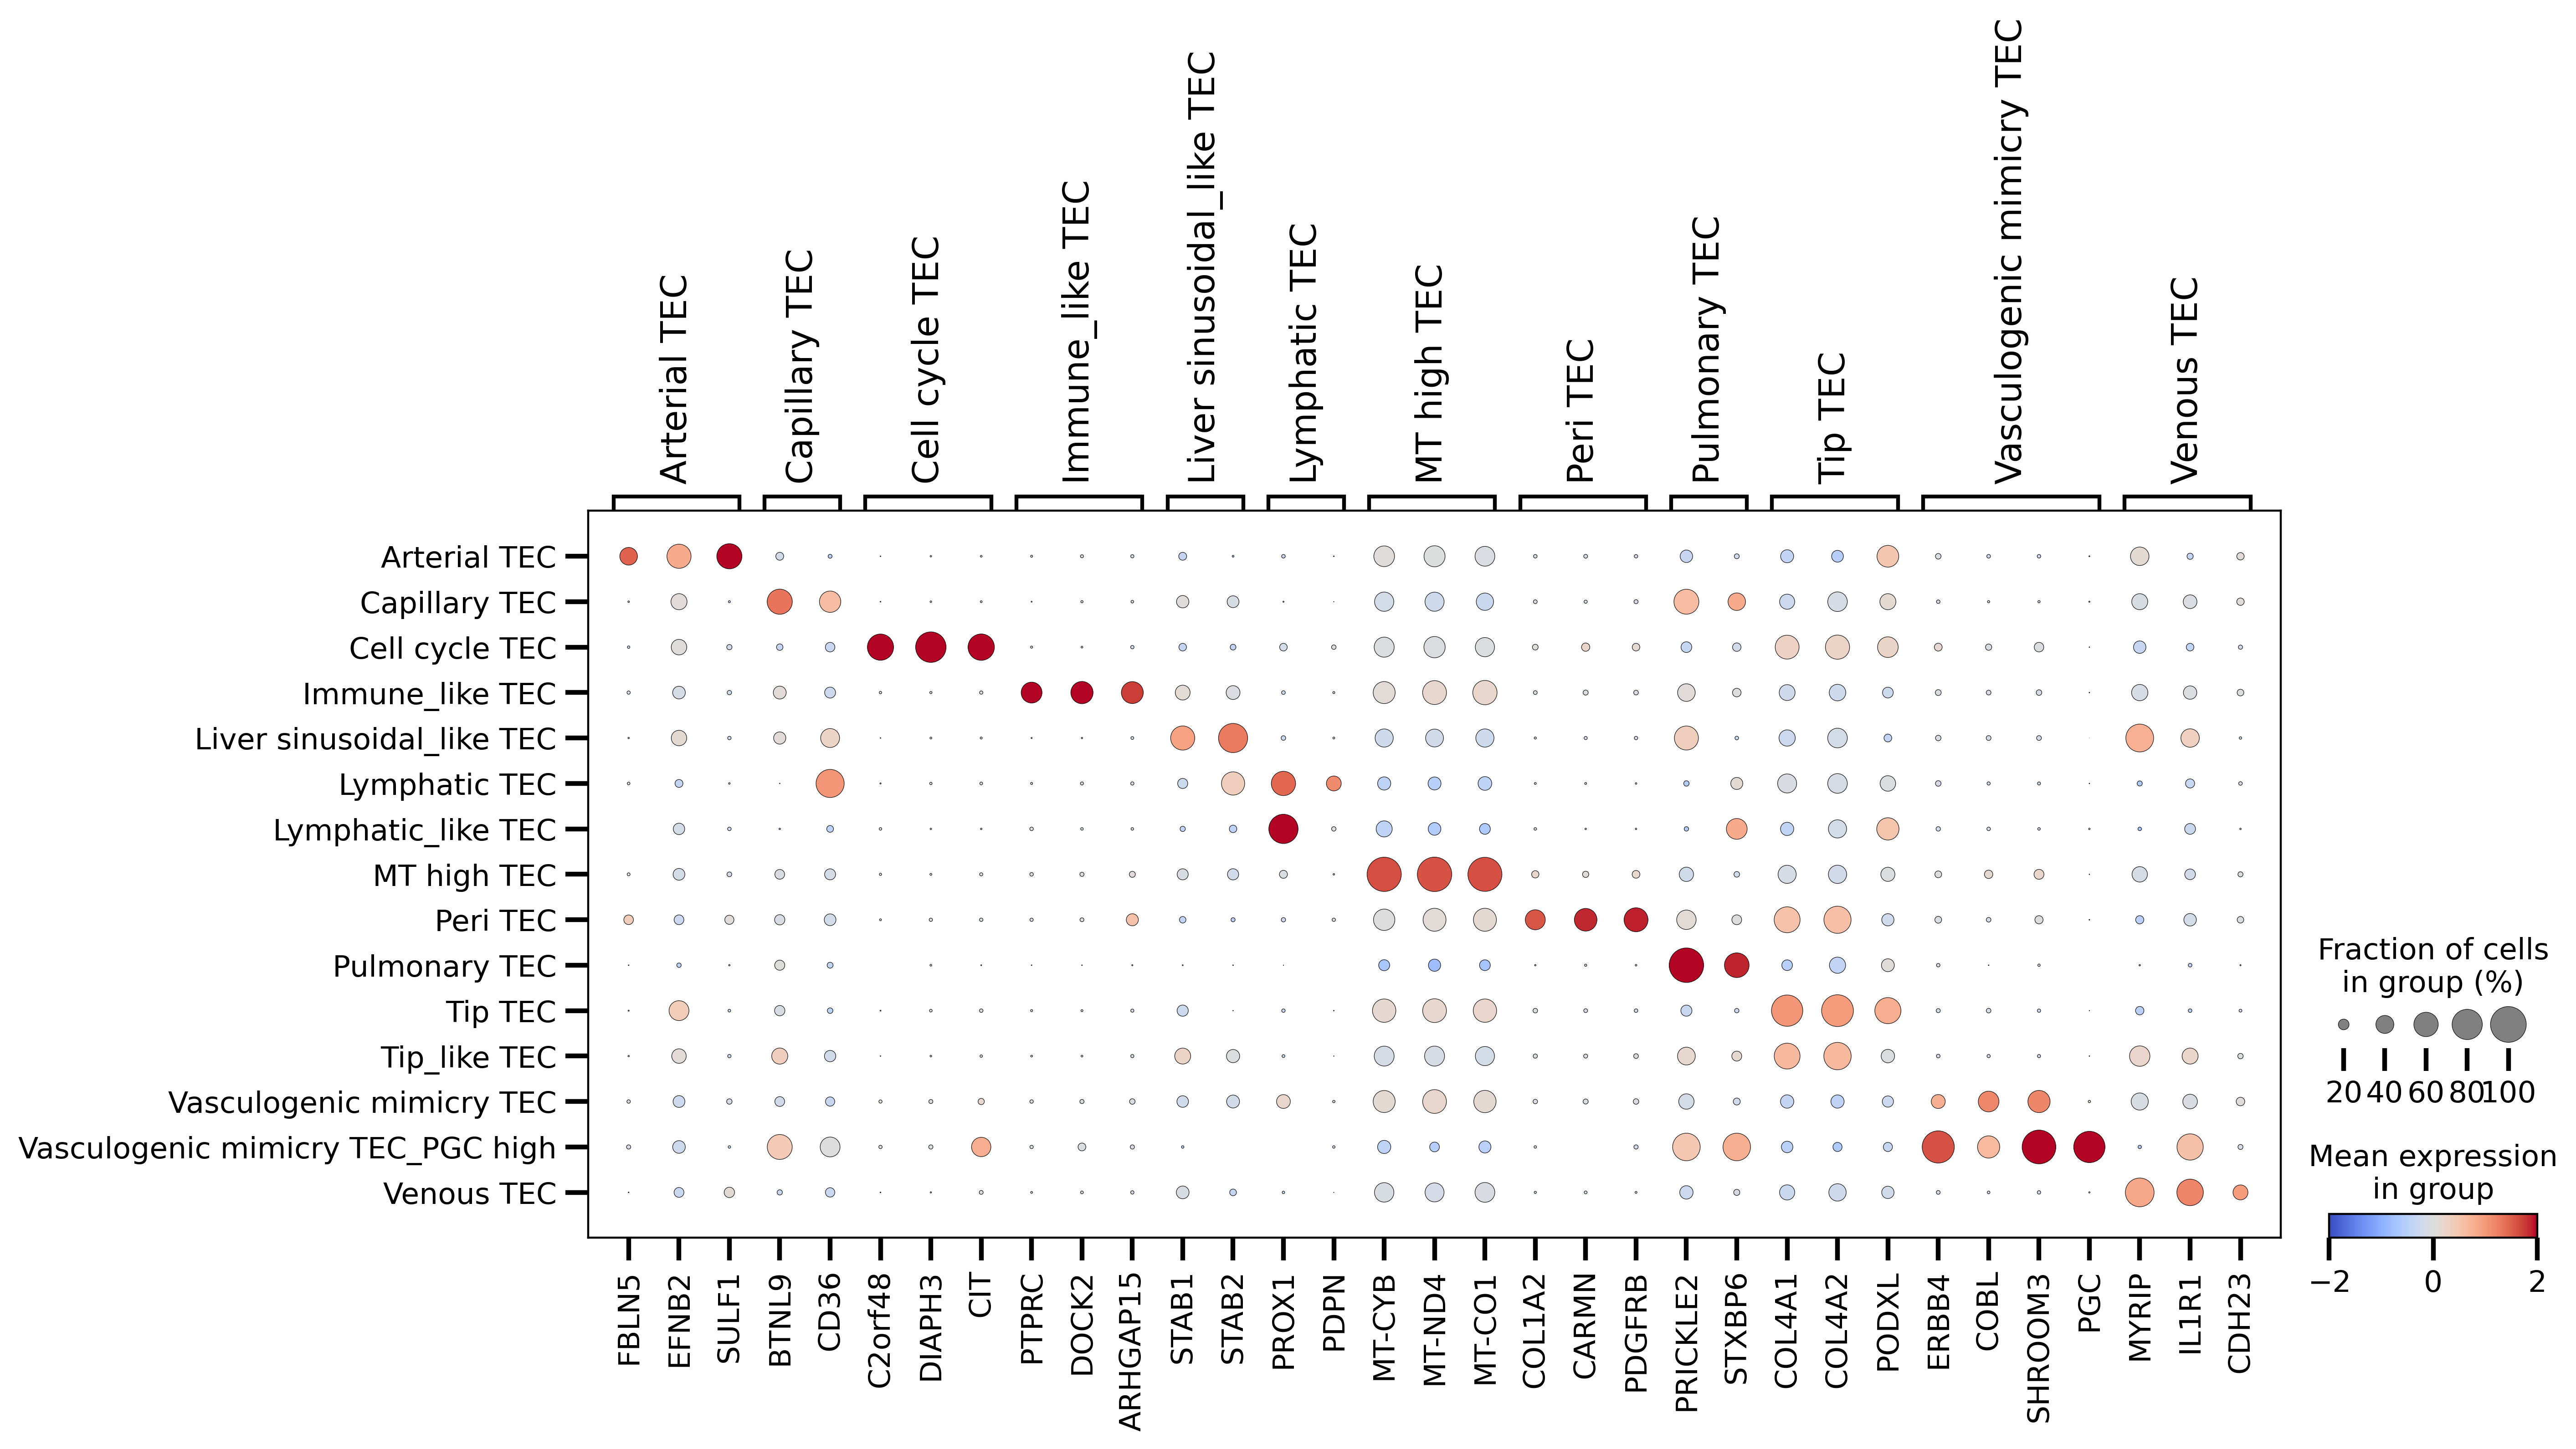

In [22]:
sc.pl.dotplot(adata, marker_dict, groupby = 'anno', use_raw = False, 
              vmin=-2, vmax=2, cmap = 'coolwarm', save='_endo.pdf')

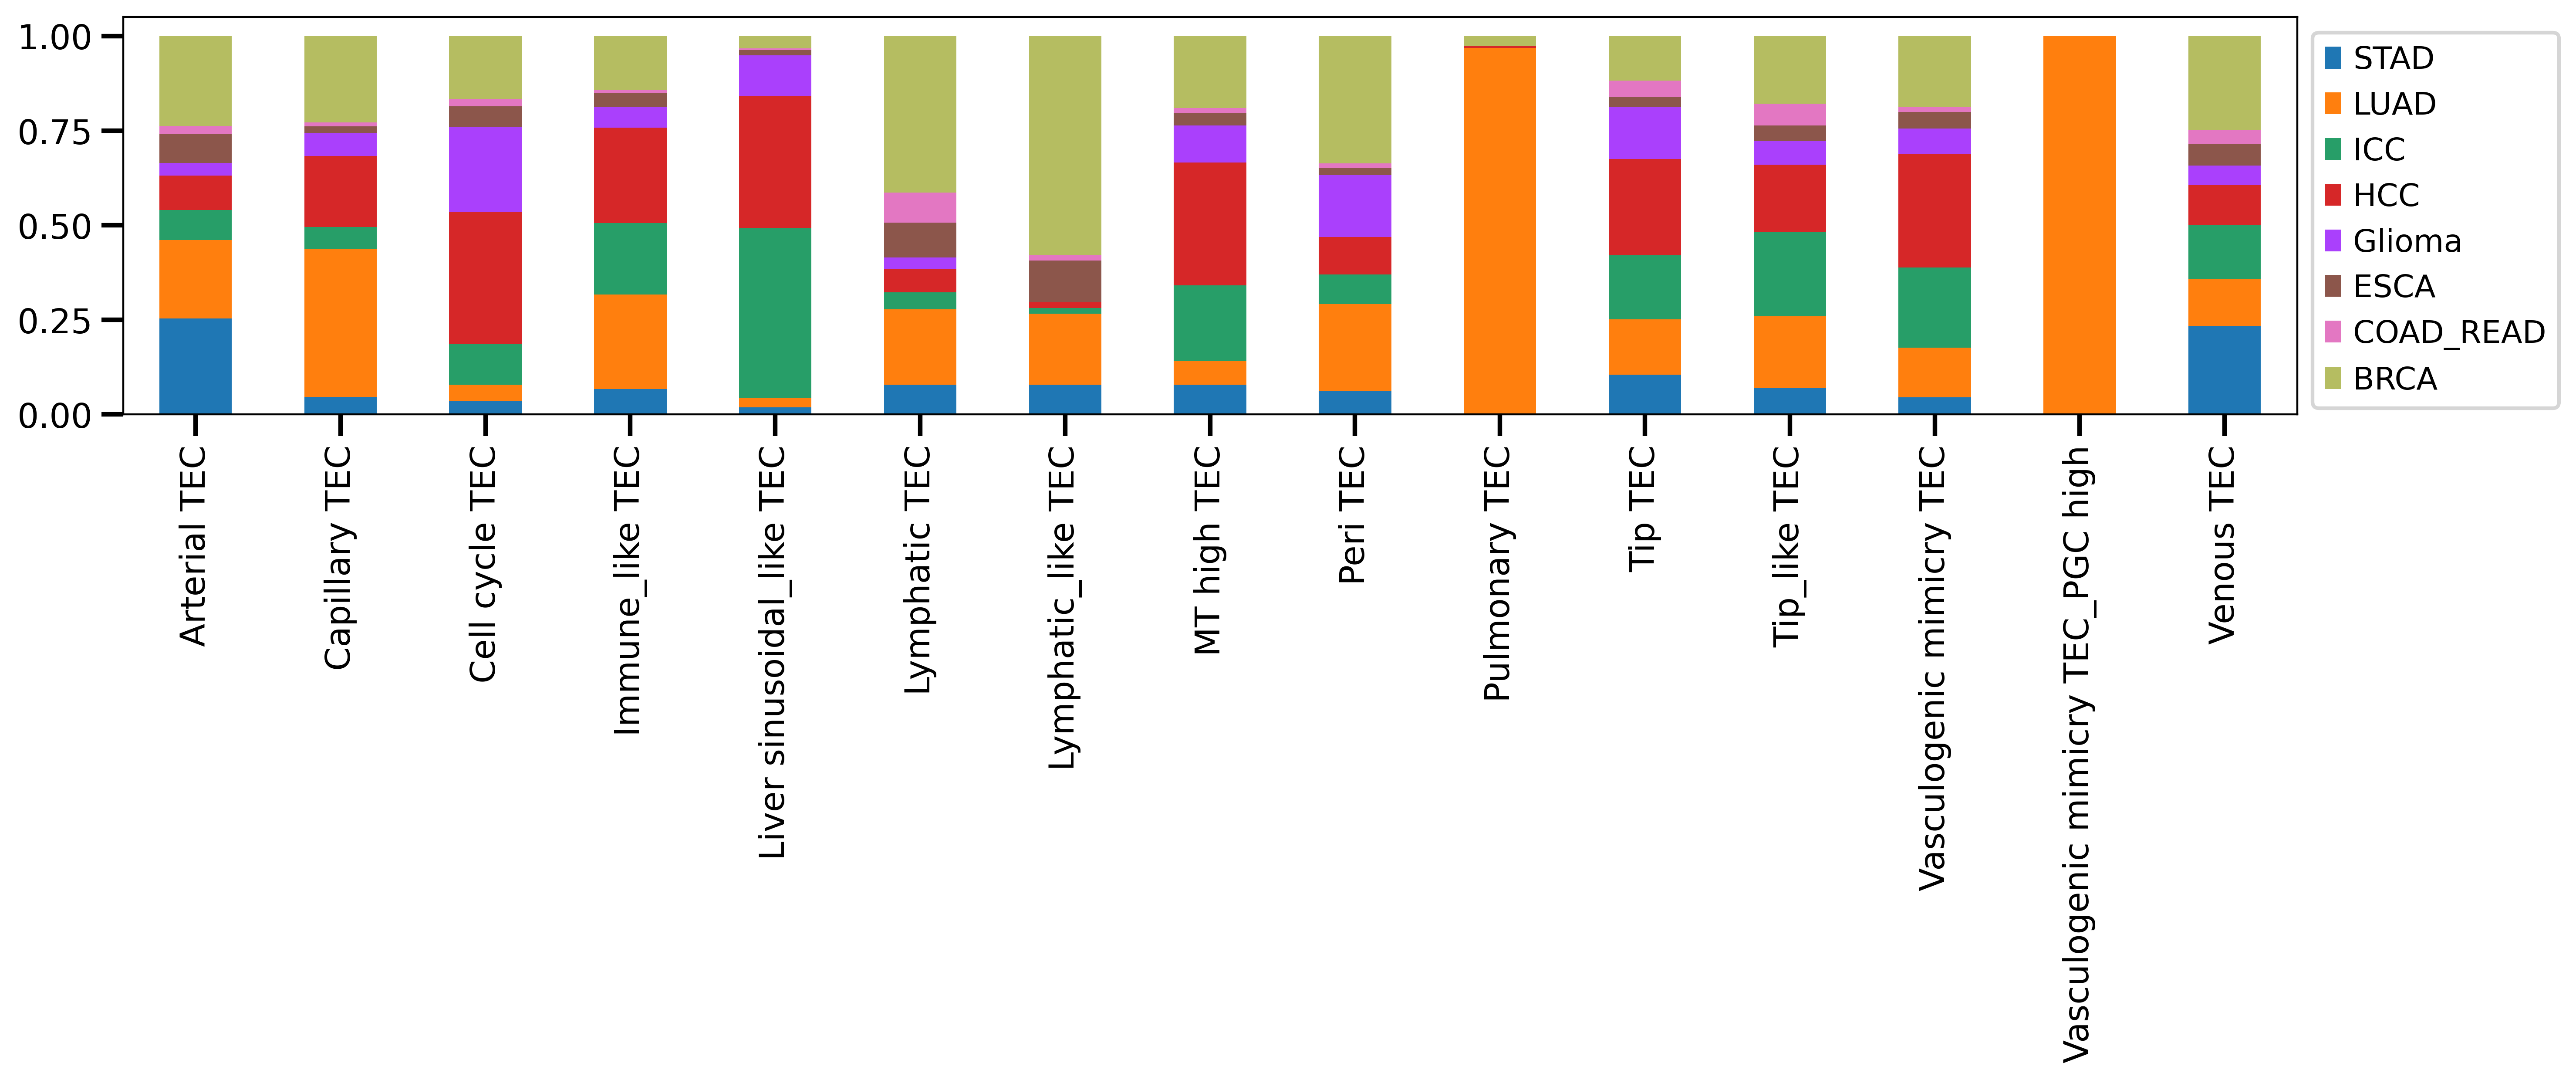

In [24]:
type_composition(adata, 'anno', 'cancer_type')
plt.savefig('figures/type_composition_cancer_type.pdf')

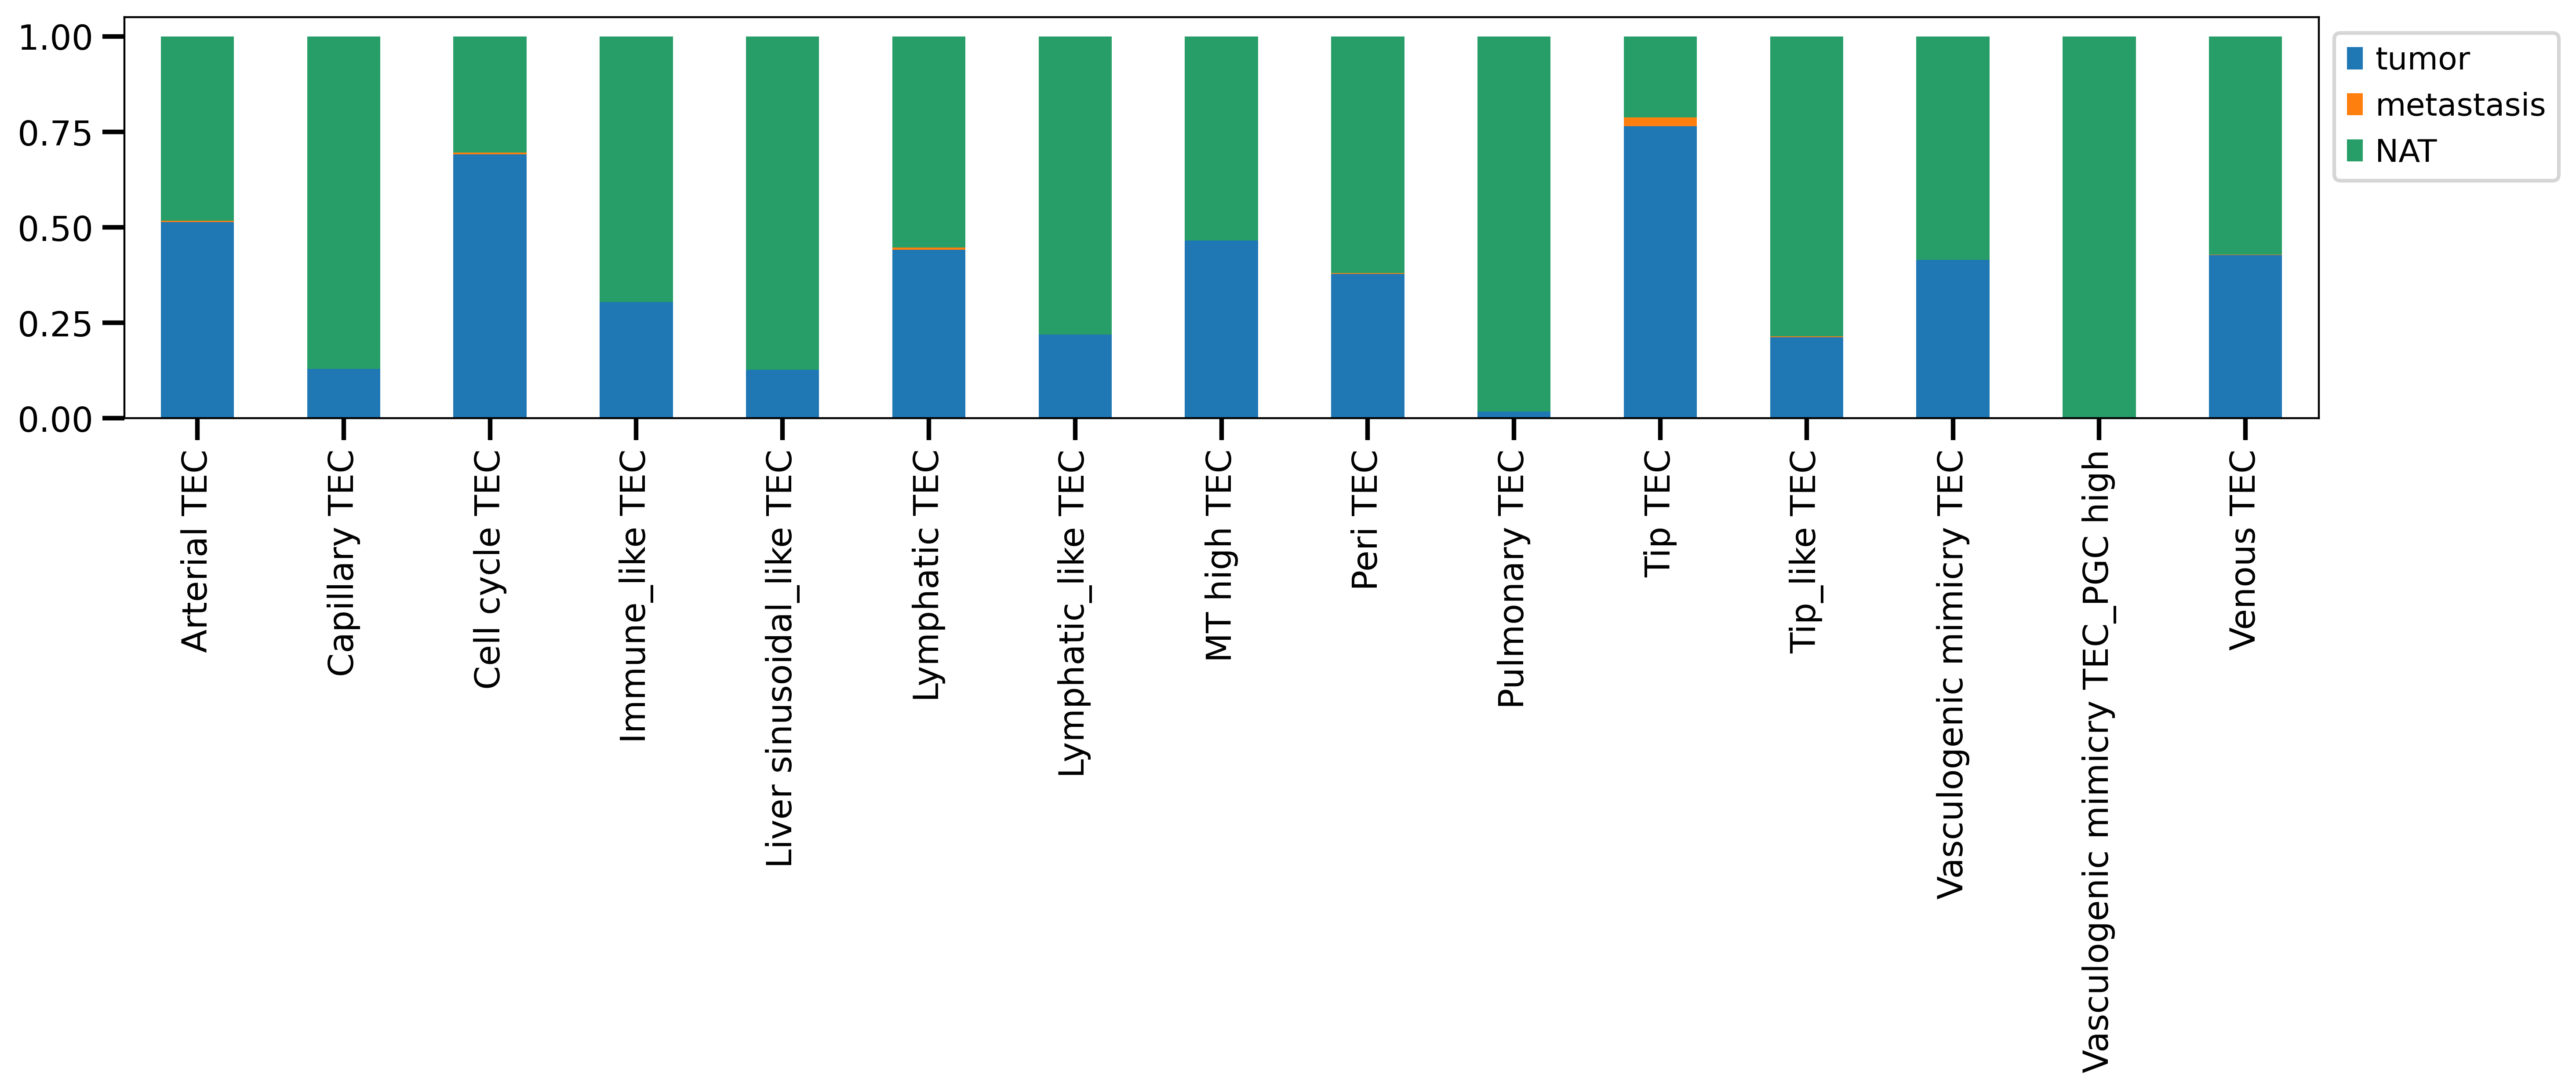

In [25]:
adata.obs['tissue'] = adata.obs['sample'].str.split('_', expand=True)[2]
type_composition(adata, 'anno', 'tissue')
plt.savefig('figures/type_composition_tissue.pdf')

In [26]:
adata_raw = sc.read('adata_all_endo_cell_sct_annotation_latest.h5ad')
adata_raw = adata_raw[adata.obs.index.tolist(), :]
adata_raw.obs['tissue'] = adata_raw.obs['sample'].str.split('_', expand=True)[2]
adata_raw.obs['anno'] = adata.obs['anno']
adata_raw.write('adata_all_endo_cell_sct_annotation_latest.h5ad')

/tmp/ipykernel_31619/2343026335.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_raw.obs['tissue'] = adata_raw.obs['sample'].str.split('_', expand=True)[2]


In [28]:
all_marker_df_sorted = pd.read_csv('endo_marker_each_cancer_stat_sorted.csv')
leiden2anno = adata.obs[['leiden', 'anno']].copy()
leiden2anno.drop_duplicates(keep='first',inplace=True)

leiden2anno['leiden'] = leiden2anno['leiden'].astype(str)
all_marker_df_sorted['cluster'] = all_marker_df_sorted['cluster'].astype(str)

leiden2anno.index = leiden2anno['leiden']
del leiden2anno['leiden']

for i in all_marker_df_sorted.index.tolist():
    
    all_marker_df_sorted.loc[i, 'anno'] = leiden2anno.loc[all_marker_df_sorted.loc[i, 'cluster'], 'anno']
    
all_marker_df_sorted.to_csv('endo_marker_each_cancer_stat_sorted.csv', index=None)    

In [30]:
adata = sc.read('adata_all_endo_cell_sct_annotation_latest.h5ad')
len(np.unique(adata.obs['anno']).tolist())

15

In [31]:
len(np.unique(adata.obs['leiden']).tolist())

15

In [32]:
all_marker_df_sorted = pd.read_csv('endo_marker_each_cancer.csv')
leiden2anno = adata.obs[['leiden', 'anno']].copy()
leiden2anno.drop_duplicates(keep='first',inplace=True)

leiden2anno['leiden'] = leiden2anno['leiden'].astype(str)
all_marker_df_sorted['cluster'] = all_marker_df_sorted['cluster'].astype(str)

leiden2anno.index = leiden2anno['leiden']
del leiden2anno['leiden']

for i in all_marker_df_sorted.index.tolist():
    
    all_marker_df_sorted.loc[i, 'anno'] = leiden2anno.loc[all_marker_df_sorted.loc[i, 'cluster'], 'anno']
    
all_marker_df_sorted.to_csv('endo_marker_each_cancer.csv', index=None)   

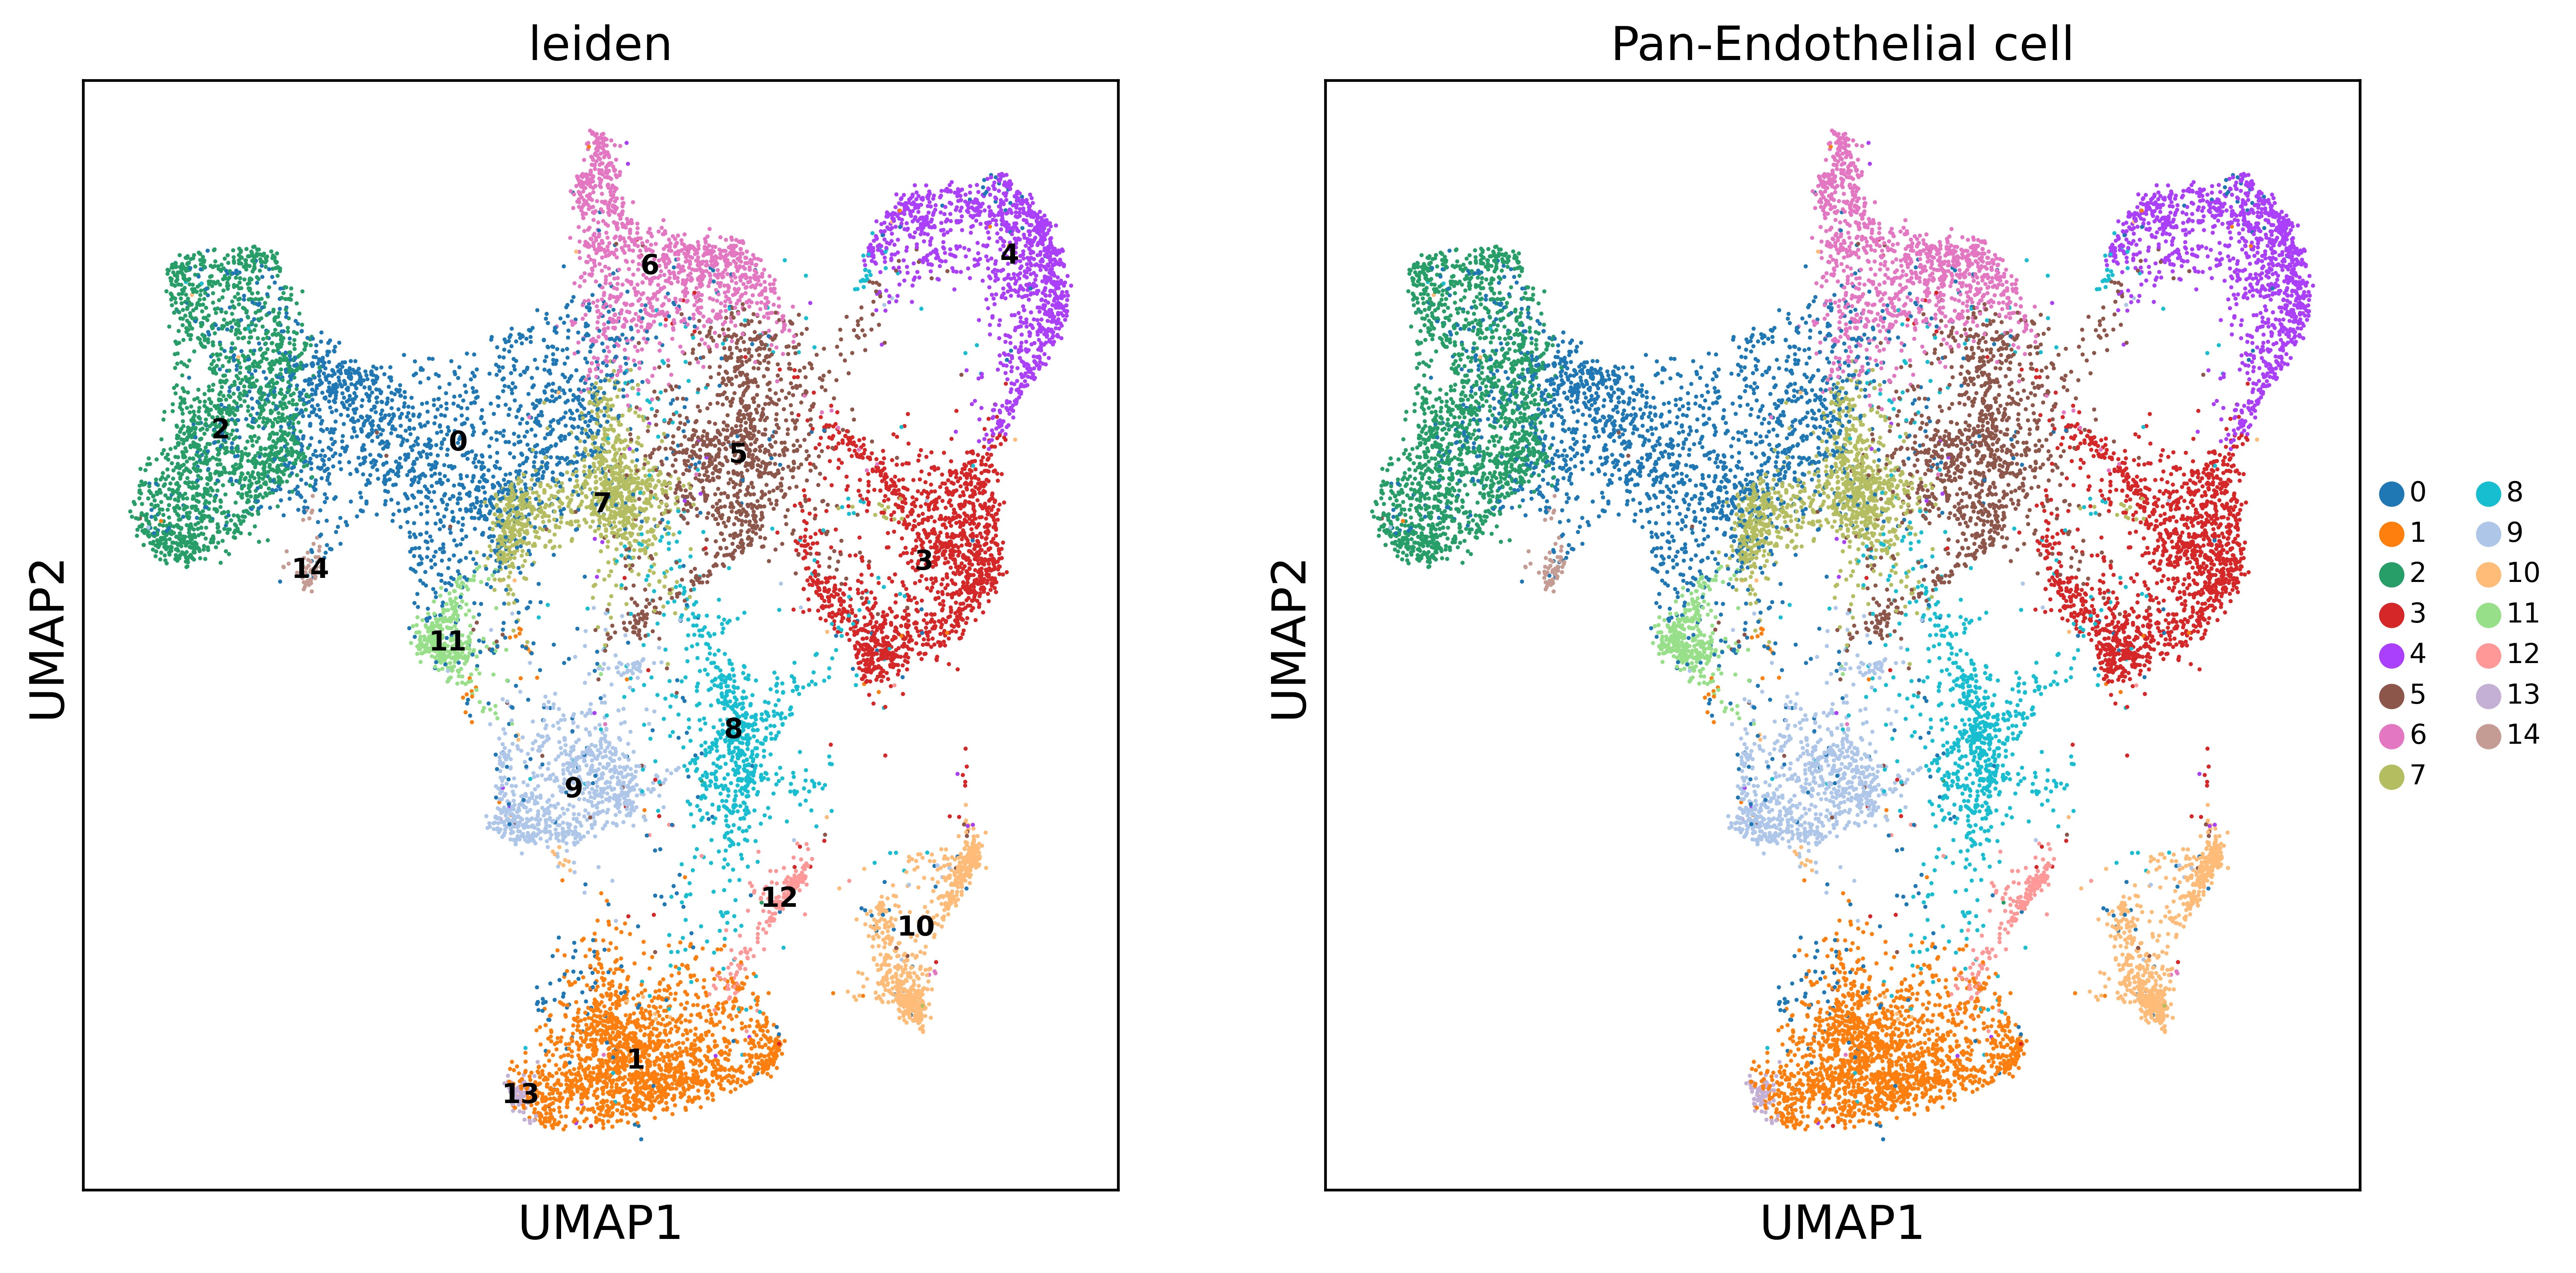

In [36]:
adata = sc.read('adata_all_endo_cell_sct_annotation_latest.h5ad')

fig, axs = plt.subplots(1, 2, figsize = (12,6), dpi = 300)
sc.pl.umap(adata, color = 'leiden', size = 6, legend_loc = 'on data', legend_fontsize = 'xx-small', ax=axs[0], show=False)
sc.pl.umap(adata, color = 'leiden', size = 6, legend_fontsize = 'xx-small', title = 'Pan-Endothelial cell',
           ax=axs[1], show=False)

plt.savefig('figures/endo_umap.pdf')

In [37]:
adata = sc.read('adata_all_endo_cell_sct_annotation_latest.h5ad')
adata.shape[0]

14752

In [38]:
adata.obs['anno'].value_counts()

Liver sinusoidal_like TEC            2167
Vasculogenic mimicry TEC             1788
Lymphatic TEC                        1711
Tip TEC                              1499
Arterial TEC                         1178
Tip_like TEC                         1160
Venous TEC                           1138
Capillary TEC                        1026
MT high TEC                           865
Peri TEC                              848
Immune_like TEC                       685
Pulmonary TEC                         351
Cell cycle TEC                        204
Vasculogenic mimicry TEC_PGC high      68
Lymphatic_like TEC                     64
Name: anno, dtype: int64